<a href="https://colab.research.google.com/github/Prakhar967/ola-ensemble-case-study/blob/main/ola_driver_scaler_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OBJECTIVE: Ola faces challenges for their drivers leaving ola, so as a data scientist we have to find the pattern leading to high churning rate for the drivers at OLA and report the same in the form of insights and recommendations that OLA can adopt to reduce this churn rate


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.ticker import ScalarFormatter
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_colwidth', None)

In [ ]:
!pip install gdown

In [ ]:
!gdown 1TFDfk9zN7UvlZMCmnbj1q5r2Goug0eRt

Downloading...
From: https://drive.google.com/uc?id=1TFDfk9zN7UvlZMCmnbj1q5r2Goug0eRt
To: /content/ola_driver_scaler.csv
100% 1.13M/1.13M [00:00<00:00, 79.6MB/s]


In [ ]:
df = pd.read_csv('ola_driver_scaler.csv')

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)     # deleting unnecessary columns

In [ ]:
# changing name of some columns for better understanding
df.rename(columns = {'MMM-YY':'Reporting Date'}, inplace = True)

In [ ]:
df

,Reporting Date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.00,0.00,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.00,0.00,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.00,0.00,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.00,0.00,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.00,0.00,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30.00,0.00,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,09/01/20,2788,30.00,0.00,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,10/01/20,2788,30.00,0.00,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,11/01/20,2788,30.00,0.00,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [ ]:
df.shape          # There are 19104 rows and 13 columns

(19104, 13)

Definition of columns:
1. Reporting Date: Reporting month and year.
2. Driver_ID: A unique identifier for every driver.
3. Age: Age of the driver.
4. Gender: Driver's gender. Male: 0, Female: 1.
5. City: City code representing the city the driver operates in.
6. Education_Level: Education level of the driver, categorized into 0 for 10+, 1 for
12+, and 2 for graduate.
7. Income: Average monthly income of the driver.
8. Date Of Joining: The date when the driver joined Ola.
9. LastWorkingDate: The most recent or final day the driver worked with Ola.
10.Joining Designation: Designation of the driver at the onset of their journey with
Ola.
11. Grade: A grade assigned to the driver at the reporting time, likely denoting
performance or other metrics.
12.Total Business Value: The total monetary value (business) a driver brings in a
month. Negative values might indicate cancellations, refunds, or other financial
adjustments.
13.Quarterly Rating: Rating assigned to drivers on a quarterly basis. Ratings range
from 1 to 5, with 5 being the best.

In [ ]:
df.info()  # checking the non null values and data types for each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Reporting Date        19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


Here noting down point is that RepotingDate , LastWorkingDate which is in date format is in object datatype and many columns are applicable for conversion to categorical datatype.

In [ ]:
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.00,19043.00,19052.00,19104.00,19104.00,19104.00,19104.00,19104.00,19104.00
mean,1415.59,34.67,0.42,1.02,65652.03,1.69,2.25,571662.07,2.01
std,810.71,6.26,0.49,0.80,30914.52,0.84,1.03,1128312.22,1.01
min,1.00,21.00,0.00,0.00,10747.00,1.00,1.00,-6000000.00,1.00
25%,710.00,30.00,0.00,0.00,42383.00,1.00,1.00,0.00,1.00
50%,1417.00,34.00,0.00,1.00,60087.00,1.00,2.00,250000.00,2.00
75%,2137.00,39.00,1.00,2.00,83969.00,2.00,3.00,699700.00,3.00
max,2788.00,58.00,1.00,2.00,188418.00,5.00,5.00,33747720.00,4.00


1.	Total Number of Records:
There are 19,104 driver-month entries in the dataset. Each row likely represents one driver’s data for one particular month.
2.	Age of Drivers:
	•	Average age is around 34.67 years.
	•	Youngest driver is 18, and the oldest is 58.
	•	Most drivers fall between 30 to 39 years (based on percentiles).
3.	Income Distribution:
	•	Average income is around 65,562, but there is high variation.
	•	Some drivers earn as low as 1,000 and some up to ₹1.88 lakhs.
	•	75% of drivers earn below 69,970, which shows a wide income range.
4.	Total Business Value:
	•	The mean business value is around 5.7 lakhs, with values ranging from –6 lakhs (likely data issue) to 3.37 crores.
	•	This suggests outliers or possibly incorrect data entries (like the negative value).
5.	Quarterly Rating:
	•	Ratings range from 1 to 5, with an average of ~2.
	•	Most drivers have a rating of 2 or below, showing a skew towards lower ratings.
6.	Driver IDs:
	•	The ID values range from 1 to 2788, indicating around 2.7k unique drivers being tracked over multiple months.
7.	Date Features:
	•	DateOfJoining ranges from 2018 to late 2020, while LastWorkingDate has placeholder future values (e.g., 2247 and 2227), possibly for drivers still active.
	•	These columns may need processing to handle still working cases correctly.

In [ ]:
# no. of unique values in the respective columns in df
for i in df.columns:
  print(i, "-->",df[i].nunique())

Reporting Date --> 24
Driver_ID --> 2381
Age --> 36
Gender --> 2
City --> 29
Education_Level --> 3
Income --> 2383
Dateofjoining --> 869
LastWorkingDate --> 493
Joining Designation --> 5
Grade --> 5
Total Business Value --> 10181
Quarterly Rating --> 4


# Missing values in my dataset

In [ ]:
df.isna().sum()

,0
Reporting Date,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0


## Missing values imputation

We can clearly see that Age , Gender  , LastWorkingDate have missing values apart from that all others are complete.

In [ ]:
cols  = ['Age' , 'Gender' , 'LastWorkingDate']

In [ ]:
for i in cols:
  print(i, '-->', df[i].nunique())

Age --> 36
Gender --> 2
LastWorkingDate --> 493


we have multiple ways to deal with imputation either mean , mode , median or more advanced imputation like KNN imputation.

<Axes: xlabel='Age', ylabel='Count'>

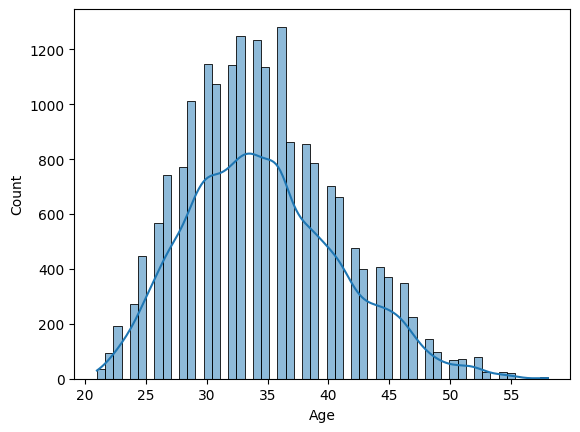

In [ ]:
sns.histplot(data = df , x = 'Age' , kde = True)

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

## KNN imputation

In [ ]:
numerical_cols = ['Age']
df_knn = df[numerical_cols].copy()

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_knn)

In [ ]:
imputer = KNNImputer(n_neighbors=5)
imputed_scaled_data = imputer.fit_transform(scaled_data)

In [ ]:
imputed_original_data = scaler.inverse_transform(imputed_scaled_data)

In [ ]:
df[numerical_cols] = imputed_original_data

for Gender

In [ ]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

for last working date

In [ ]:
df[df['Driver_ID']==1][['Reporting Date','Dateofjoining','LastWorkingDate']]

,Reporting Date,Dateofjoining,LastWorkingDate
0,01/01/19,24/12/18,NaN
1,02/01/19,24/12/18,NaN
2,03/01/19,24/12/18,03/11/19


In [ ]:
df[df['Driver_ID']==2][['Reporting Date','Dateofjoining','LastWorkingDate']]

,Reporting Date,Dateofjoining,LastWorkingDate
3,11/01/20,11/06/20,NaN
4,12/01/20,11/06/20,NaN


In [ ]:
df[df['Driver_ID']==6][['Reporting Date','Dateofjoining','LastWorkingDate']]

,Reporting Date,Dateofjoining,LastWorkingDate
13,08/01/20,31/07/20,NaN
14,09/01/20,31/07/20,NaN
15,10/01/20,31/07/20,NaN
16,11/01/20,31/07/20,NaN
17,12/01/20,31/07/20,NaN


In [ ]:
df[df['Driver_ID']==8][['Reporting Date','Dateofjoining','LastWorkingDate']]

,Reporting Date,Dateofjoining,LastWorkingDate
18,09/01/20,19/09/20,NaN
19,10/01/20,19/09/20,NaN
20,11/01/20,19/09/20,15/11/20


as we can see a pattern that for every row of a particular driverId reporting date is aggregated for first day of every month so if in that month driver does not decide to leave then last working date will be empty as because of that we are seeing missing values in the dataset. hence we can fill it with constant value. We can place a random default date that should be also within the range of datetime that will mean he is still working and also i will continue to retain my datetime data type.
We can place '2247-01-01' as default date in place of NaT

In [ ]:
df['LastWorkingDate'] = df['LastWorkingDate'].fillna(pd.to_datetime('2247-01-01')) # Using a date within the valid range

In [ ]:
df.isna().sum()

,0
Reporting Date,0
Driver_ID,0
Age,0
Gender,0
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,0
Joining Designation,0


In [ ]:
df['Gender'].nunique()

2

# converting into categories

In [ ]:
for i in df.columns:
  print(i, "-->",df[i].nunique())

Reporting Date --> 24
Driver_ID --> 2381
Age --> 37
Gender --> 2
City --> 29
Education_Level --> 3
Income --> 2383
Dateofjoining --> 869
LastWorkingDate --> 494
Joining Designation --> 5
Grade --> 5
Total Business Value --> 10181
Quarterly Rating --> 4


In [ ]:
cat = ['Gender','Education_Level','Joining Designation','Grade']

In [ ]:
for i in cat:
  df[i] = df[i].astype('category')

In [ ]:
date = ['Reporting Date','Dateofjoining','LastWorkingDate']

# Converting into Datetime

In [ ]:
for i in date:
  df[i] = pd.to_datetime(df[i])

In [ ]:
df['lastworkingyear'] = df['LastWorkingDate'].dt.year
df['reportingyear'] = df['Reporting Date'].dt.year

In [ ]:
df[df['reportingyear']>df['lastworkingyear']]

,Reporting Date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,lastworkingyear,reportingyear
1078,2020-01-01,162,36.00,0.00,C2,1,100064,2019-10-31,2019-12-30,3,3,0,1,2019,2020
1568,2020-01-01,230,34.00,0.00,C25,0,44359,2018-10-13,2019-12-30,2,2,0,1,2019,2020
4601,2019-01-01,689,28.00,1.00,C10,1,17186,2018-10-14,2018-12-31,1,1,0,1,2018,2019
5774,2020-01-01,863,32.00,1.00,C29,2,40295,2019-08-24,2019-12-30,1,1,0,1,2019,2020
6209,2019-01-01,929,31.00,0.00,C4,1,20245,2018-07-14,2018-12-31,2,2,0,1,2018,2019
6466,2019-01-01,967,45.00,0.00,C11,2,59526,2018-10-05,2018-12-31,2,2,0,1,2018,2019
8201,2020-01-01,1219,22.00,1.00,C20,0,30295,2019-10-25,2019-12-31,1,1,0,1,2019,2020
8991,2019-01-01,1329,31.00,0.00,C29,2,70088,2018-09-10,2018-12-31,1,1,0,1,2018,2019
15845,2020-01-01,2354,32.00,0.00,C18,0,92847,2017-02-12,2019-12-31,2,3,0,1,2019,2020
18219,2019-01-01,2665,36.00,1.00,C17,2,22719,2018-10-15,2018-12-31,1,1,0,1,2018,2019


As we can clearly see that there are some inconsistencies in our data as reporting year is 2019 but last working date is 2018 and also last working date is 2019 and reporting date is 2020 , but this is not a error rather these are few edge cases mostly occured during year-end transition andlikely sue to administrative processing delays, HR system update or year beginning reporting

In [ ]:
df.drop(['lastworkingyear','reportingyear'],axis =1,inplace = True)

# Checking for Duplicates

In [ ]:
df.columns

Index(['Reporting Date', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [ ]:
df.duplicated().sum()

np.int64(0)

we can see that there is no duplicate rows in our dataset but to be sure we can take subset of our data and then check for duplicacy

In [ ]:
sub = ['Driver_ID','Age','Gender','City','Education_Level','Income']

In [ ]:
df.duplicated(subset=sub).sum()

np.int64(15240)

I chose not to delete records even if some columns (like Age, Gender, City, etc.) appear similar across months for the same driver.This is because the dataset is time-based, and each row represents a monthly snapshot of driver activity.Even when some features remain constant, others — such as Total Business Value, Quarterly Rating, or LastWorkingDate — may change. These evolving values are crucial for identifying patterns and signals that lead to churn. Additionally, similar or stable patterns help the model learn what a non-churner looks like over time. Removing them would eliminate the very context and contrast needed for the model to distinguish between churn and retention behaviors.Therefore, I kept all monthly records and focused on feature engineering to capture time-based trends instead of filtering out valid data.

# Outlier Treatment

In [ ]:
df.columns

Index(['Reporting Date', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

## For Age

<Axes: ylabel='Age'>

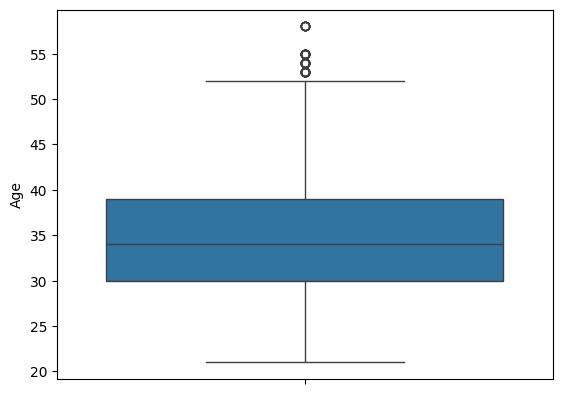

In [ ]:
sns.boxplot(data = df , y = 'Age')

In [ ]:
q1 = df['Age'].quantile(.25)
q3 = df['Age'].quantile(.75)
iqr = q3-q1
lower_bound_age = q1 - 1.5 * iqr
upper_bound_age = q3 + 1.5 * iqr

In [ ]:
outliers = df[(df['Age'] < lower_bound_age) | (df['Age'] > upper_bound_age)]

In [ ]:
outliers['Age'].unique()

array([53., 54., 55., 58.])

since it is possible that we can have drivers of age 53, 54, 55, 58 and there is no upper age limit in ola so we are not going to consider it as outlier.

## For income

<Axes: ylabel='Income'>

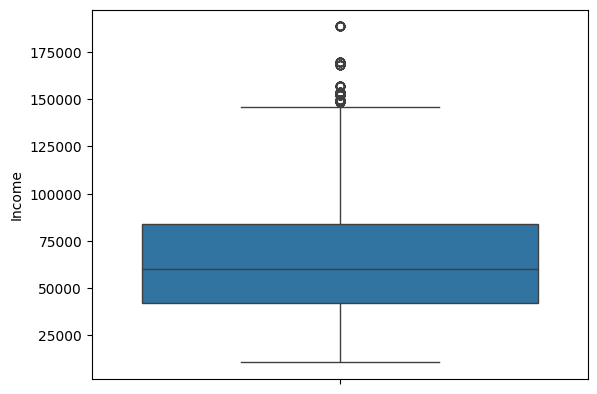

In [ ]:
sns.boxplot(data = df , y= 'Income')

In [ ]:
q1 = df['Income'].quantile(.25)
q3 = df['Income'].quantile(.75)
iqr = q3-q1
lower_bound_income = q1 - 1.5 * iqr
upper_bound_income = q3 + 1.5 * iqr

In [ ]:
outlier_income = df[(df['Income'] < lower_bound_income) | (df['Income'] > upper_bound_income)]

In [ ]:
outlier_income

,Reporting Date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
1036,2019-01-01,153,37.00,1.00,C22,1,148588,2018-10-14,2247-01-01,5,5,0,1
1037,2019-02-01,153,37.00,1.00,C22,1,148588,2018-10-14,2247-01-01,5,5,0,1
1038,2019-03-01,153,37.00,1.00,C22,1,148588,2018-10-14,2247-01-01,5,5,0,1
1039,2019-04-01,153,37.00,1.00,C22,1,148588,2018-10-14,2247-01-01,5,5,0,1
1040,2019-05-01,153,37.00,1.00,C22,1,148588,2018-10-14,2247-01-01,5,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,2020-08-01,2420,31.00,0.00,C5,2,169549,2015-07-30,2247-01-01,2,5,411070,1
16372,2020-09-01,2420,31.00,0.00,C5,2,169549,2015-07-30,2247-01-01,2,5,352130,1
16373,2020-10-01,2420,31.00,0.00,C5,2,169549,2015-07-30,2247-01-01,2,5,409790,1
16374,2020-11-01,2420,31.00,0.00,C5,2,169549,2015-07-30,2247-01-01,2,5,272340,1


In [ ]:
outlier_income.shape        # how many rows are there for outliers

(188, 13)

In [ ]:
outlier_income['Income'].unique().min()

np.int64(148588)

In [ ]:
outlier_income['Income'].unique().max()

np.int64(188418)

In [ ]:
outlier_income[outlier_income['Total Business Value']==0].shape

(51, 13)

In [ ]:
outlier_income[outlier_income['Quarterly Rating']==1].shape

(68, 13)

During data exploration, we identified 188 records with income values exceeding ₹1.48 lakh, flagged as outliers using the IQR method. Upon deeper inspection, these records displayed multiple inconsistencies that justified their removal:

Only 11 unique income values were responsible for all 188 records, suggesting repeated unrealistic values rather than genuine variation.

51 records had Total Business Value = 0, making it implausible for drivers to earn such high income without generating any business.

68 records had a Quarterly Rating = 1, indicating poor performance — yet reported top-tier earnings, which contradicts operational logic.

Most of these drivers had a Joining Designation = 5, with some labeled as 2, implying legitimate onboarding, yet their performance data (zero business, lowest rating) did not align with their earnings.

The inconsistencies extended across multiple features — income, grade, rating, business value, and designation — making it clear that these records were not just statistical outliers but logically invalid entries.

Given Ola’s goal of predicting churn based on reliable behavior patterns, retaining such contradictory records could mislead the model, introduce false signals, and affect overall accuracy.

Therefore, I removed all records containing these 11 unrealistic income values to ensure the model learns from clean, consistent, and business-aligned data.

In [ ]:
df_cleaned = df.drop(index = outlier_income.index)  # we are removing the outliers and storing the modified data in df_cleaned

In [ ]:
df_cleaned.shape

(18916, 13)

In [ ]:
df_cleaned

,Reporting Date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.00,0.00,C23,2,57387,2018-12-24,2247-01-01,1,1,2381060,2
1,2019-02-01,1,28.00,0.00,C23,2,57387,2018-12-24,2247-01-01,1,1,-665480,2
2,2019-03-01,1,28.00,0.00,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.00,0.00,C7,2,67016,2020-11-06,2247-01-01,2,2,0,1
4,2020-12-01,2,31.00,0.00,C7,2,67016,2020-11-06,2247-01-01,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.00,0.00,C27,2,70254,2020-06-08,2247-01-01,2,2,740280,3
19100,2020-09-01,2788,30.00,0.00,C27,2,70254,2020-06-08,2247-01-01,2,2,448370,3
19101,2020-10-01,2788,30.00,0.00,C27,2,70254,2020-06-08,2247-01-01,2,2,0,2
19102,2020-11-01,2788,30.00,0.00,C27,2,70254,2020-06-08,2247-01-01,2,2,200420,2


we have successfully removed all the rows for income outlier

## For Total Business Value

In [ ]:
df_cleaned['Total Business Value'].nunique()

10080

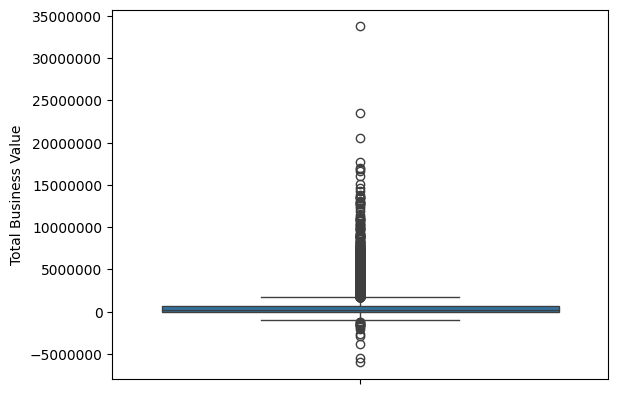

In [ ]:
sns.boxplot(data = df_cleaned , y = 'Total Business Value')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
q1 = df_cleaned['Total Business Value'].quantile(.25)
q3 = df_cleaned['Total Business Value'].quantile(.75)
iqr = q3-q1
lower_bound_tv = q1 - 1.5 * iqr
upper_bound_tv = q3 + 1.5 * iqr

In [ ]:
tv_outliers = df_cleaned[(df_cleaned['Total Business Value'] < lower_bound_tv) | (df_cleaned['Total Business Value'] > upper_bound_tv)]

In [ ]:
tv_outliers.shape

(1348, 13)

In [ ]:
tv_outliers[tv_outliers['Total Business Value']>0].head()

,Reporting Date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.00,0.00,C23,2,57387,2018-12-24,2247-01-01,1,1,2381060,2
76,2019-03-01,21,33.00,1.00,C29,1,22755,2018-05-12,2247-01-01,1,1,3295370,4
114,2019-01-01,25,29.00,0.00,C24,1,102077,2017-10-30,2247-01-01,1,3,2552300,3
115,2019-02-01,25,29.00,0.00,C24,1,102077,2017-10-30,2247-01-01,1,3,2143680,3
116,2019-03-01,25,29.00,0.00,C24,1,102077,2017-10-30,2247-01-01,1,3,2925260,3


In [ ]:
tv_outliers[tv_outliers['Total Business Value']< 0].head()

,Reporting Date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
537,2019-02-01,78,35.00,0.00,C21,0,105946,2018-09-16,2247-01-01,2,4,-1629620,2
2195,2019-06-01,342,44.00,0.00,C18,2,83084,2018-07-09,2247-01-01,3,3,-6000000,4
2284,2019-06-01,355,34.00,0.00,C22,2,135879,2018-06-16,2247-01-01,3,3,-1850000,1
2951,2020-01-01,440,39.00,0.00,C16,1,113125,2013-08-11,2247-01-01,2,4,-1477940,1
4973,2019-01-01,739,30.00,1.00,C20,0,108768,2017-06-19,2247-01-01,1,3,-1244820,1


In [ ]:
# average total business value generated by the driver in a month
x = df_cleaned['Total Business Value'].quantile(.5)
print(int(x))

250000


This is the average business value that a driver generates in a month

In [ ]:
tv_outliers[['Quarterly Rating','Grade','Joining Designation','Total Business Value']].value_counts()

Quarterly Rating  Grade  Joining Designation  Total Business Value
4                 1      1                    3000000                 3
3                 3      3                    2000000                 3
4                 1      1                    5000000                 2
                  2      1                    3000000                 2
3                 4      1                    2000000                 2
                                                                     ..
                  3      1                    3121010                 1
                                              3095380                 1
                                              3076690                 1
                                              2981520                 1
                                              3659370                 1
Name: count, Length: 1333, dtype: int64

While analyzing the Total Business Value column, which represents the revenue contribution of each driver to Ola, we identified 1348 outliers using the IQR method. These outliers accounted for nearly 7% of the dataset and included both extremely high and low values. Upon deeper inspection, it was observed that some early-stage drivers, with low joining designations and poor ratings, were showing negative or zero business value — a scenario that aligns with expected behavior such as cancellations or inactivity. However, what appeared unusual was that some of these early-stage or low-grade drivers were associated with exceptionally high business values, which seemed unrealistic and suggested possible data inconsistencies. Conversely, some high-grade drivers were found to have negative business values, which contradicts their elevated status and raised further doubts about data accuracy or timing of updates in driver performance grading.

This conflicting pattern indicated that while some outliers might represent real-world edge cases — such as temporary dips in performance, personal circumstances, or dual-platform driving — others could be attributed to data quality issues or untracked factors. Given the volume of these outliers, removing them altogether would have led to the loss of potentially important behavioral patterns, reduced diversity in the dataset, and increased the risk of model bias, especially when the goal is to understand the varied reasons behind driver churn.

To mitigate the impact of these extreme values without discarding valuable data, we chose to apply 95th percentile capping to the Total Business Value column. This approach limits the influence of abnormally high values, ensuring that tree-based models like XGBoost and LightGBM are not skewed by outliers, while preserving the overall context and learning from both typical and atypical driver behaviors. This trade-off supports our objective of building a reliable churn prediction model that is robust, inclusive of edge cases, and reflective of real-world variability.

CAPPING

In [ ]:
lower_cap = df_cleaned['Total Business Value'].quantile(0.05)
upper_cap = df_cleaned['Total Business Value'].quantile(0.95)
df_cleaned['Total Business Value'] = df_cleaned['Total Business Value'].apply(lambda x: lower_cap if x < lower_cap else upper_cap if x > upper_cap else x)

AGAIN CHECKING FOR OUTLIER

In [ ]:
q1_TV = df_cleaned['Total Business Value'].quantile(.25)
q3_TV = df_cleaned['Total Business Value'].quantile(.75)
iqr = q3-q1
lower_bound_tv = q1_TV - 1.5 * iqr
upper_bound_tv = q3_TV + 1.5 * iqr

In [ ]:
tv_outliers_new = df_cleaned[(df_cleaned['Total Business Value'] < lower_bound_tv) | (df_cleaned['Total Business Value'] > upper_bound_tv)]

In [ ]:
tv_outliers_new.shape

(1332, 13)

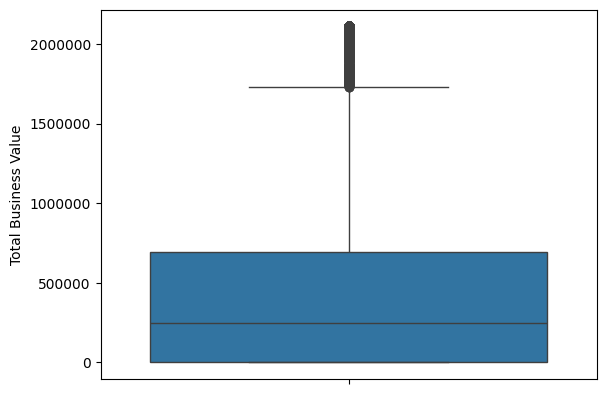

In [ ]:
sns.boxplot(data = df_cleaned , y = 'Total Business Value')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
cols  = ['Reporting Date', 'Driver_ID','City','Dateofjoining']

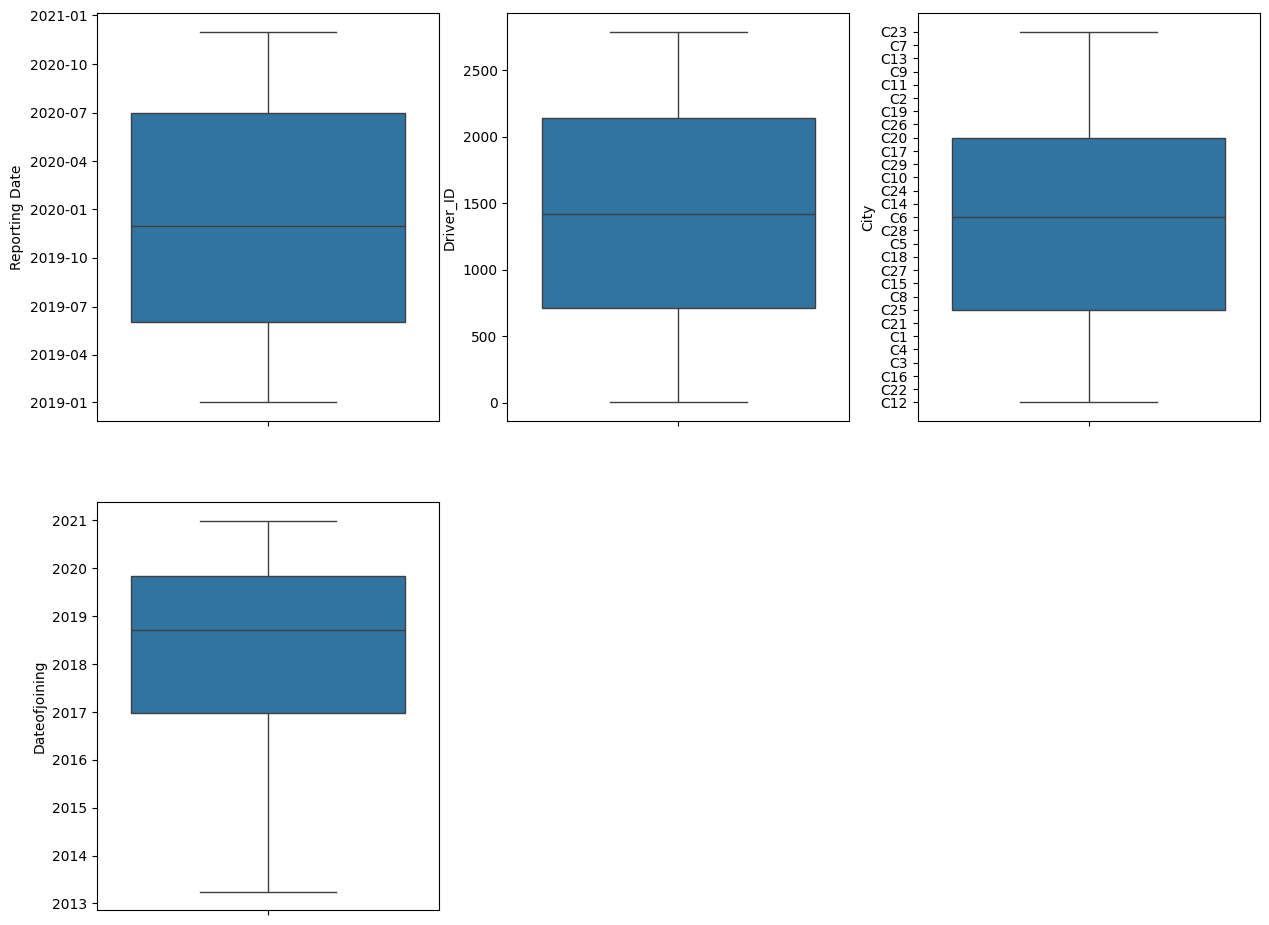

In [ ]:
plt.figure(figsize=(15,18))
for i,j in enumerate(cols, 1):
  plt.subplot(3,3,i)
  sns.boxplot(data = df_cleaned , y = j)

I have used the remaining columnns for outliers check and it looks safe to move forward , although i still see some outliers in total business value but i will go on with it and check which is giving me better result as capping at 90 percentile is removing all the outliers in total business value but again we would be losing some trend so we would tune it if our result is not better , and remaining others are categorical column with only limited values.

# Feature Engineering

## creating Quarterly rating

In [ ]:
df_sorted = df_cleaned.sort_values(by=['Driver_ID', 'Reporting Date'])

In [ ]:
df_sorted['next_month_rating'] = df_sorted.groupby('Driver_ID')['Quarterly Rating'].shift(-1)
df_sorted['next_month_rating'] = df_sorted['next_month_rating'].fillna(0)

In [ ]:
df_sorted['quarterly_trend'] = (df_sorted['next_month_rating'] > df_sorted['Quarterly Rating']).astype('int')
new_rating = df_sorted[['Driver_ID' ,'Reporting Date', 'quarterly_trend']]

In [ ]:
df_cleaned = df_cleaned.merge(new_rating, on=['Driver_ID','Reporting Date'], how='left')

## Trend for monthly income

In [ ]:
income_trend = df_cleaned.sort_values(by=['Driver_ID', 'Reporting Date'])

In [ ]:
income_trend['next_month_income'] = income_trend.groupby('Driver_ID')['Income'].shift(-1)
income_trend['next_month_income'] = income_trend['next_month_income'].fillna(0)

In [ ]:
income_trend['income_trend'] = (income_trend['next_month_income'] > income_trend['Income']).astype('int')
new_income = income_trend[['Driver_ID' ,'Reporting Date', 'income_trend']]

In [ ]:
df_cleaned = df_cleaned.merge(new_income, on=['Driver_ID','Reporting Date'], how='left')

Created income_trend column by checking if a driver’s monthly income increased in the next available month. Assigned 1 where an increase was observed. This helps in identifying performance-linked retention or churn behavior.

## Aggregating DriverID

In [ ]:
df_cleaned.columns

Index(['Reporting Date', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'quarterly_trend', 'income_trend'],
      dtype='object')

Checking if driver worked in multiple cities

In [ ]:
city_counts = df_cleaned.groupby('Driver_ID')['City'].nunique()
drivers_with_multiple_cities = city_counts[city_counts > 1]
print(f"Number of drivers with multiple cities: {drivers_with_multiple_cities.shape[0]}")

Number of drivers with multiple cities: 0


In [ ]:
agg_df = df_cleaned.groupby('Driver_ID').agg({'Reporting Date': 'max','Age': 'first','Gender': 'first','City': 'first',
                                      'Education_Level': lambda x: x.mode().iloc[0],'Income': 'median','Dateofjoining': 'first',
                                      'LastWorkingDate': 'min','Joining Designation': 'first','Grade': lambda x: x.mode().iloc[0],
                                      'Total Business Value': 'sum','Quarterly Rating': 'mean' ,'quarterly_trend':'max','income_trend':'max' }).reset_index()

In [ ]:
# Sort the DataFrame by Driver_ID and Reporting Date
df_sorted = df_cleaned.sort_values(by=['Driver_ID', 'Reporting Date'])

# Extract the latest row for each Driver_ID
latest_grade_df = df_sorted.groupby('Driver_ID').tail(1)[['Driver_ID', 'Grade']]

# Merge this with your aggregated dataset
agg_df = agg_df.drop(columns=['Grade'])  # Remove old Grade column if already there
agg_df = agg_df.merge(latest_grade_df, on='Driver_ID', how='left')

## Extracting date related features

In [ ]:
agg_df['joiningmonth'] = agg_df['Dateofjoining'].dt.month
agg_df['joiningmonth'] = agg_df['joiningmonth'].astype('object')
agg_df['joiningyear'] = agg_df['Dateofjoining'].dt.year
agg_df['joiningyear'] = agg_df['joiningyear'].astype('object')

In [ ]:
valid_mask = agg_df['LastWorkingDate'] != pd.to_datetime('2247-01-01')

In [ ]:
agg_df.loc[valid_mask ,'lastworkingYear'] = agg_df.loc[valid_mask , 'LastWorkingDate'].dt.year
agg_df['lastworkingYear'] = agg_df['lastworkingYear'].astype('object')
agg_df['lastworkingYear']  = agg_df['lastworkingYear'].fillna('still working')

In [ ]:
agg_df.loc[valid_mask ,'lastworkingMonth'] = agg_df.loc[valid_mask , 'LastWorkingDate'].dt.month
agg_df['lastworkingMonth'] = agg_df['lastworkingMonth'].astype('object')
agg_df['lastworkingMonth']  = agg_df['lastworkingMonth'].fillna('still working')

## Creating Tenure

In [ ]:
valid_mask = agg_df['LastWorkingDate'] != pd.to_datetime('2247-01-01')
agg_df.loc[valid_mask, 'tenure_months'] = (agg_df.loc[valid_mask, 'lastworkingYear'].astype(int) - agg_df.loc[valid_mask, 'joiningyear'].astype(int)) * 12 + (agg_df.loc[valid_mask, 'lastworkingMonth'].astype(int) - agg_df.loc[valid_mask, 'joiningmonth'].astype(int))

agg_df.loc[~valid_mask, 'tenure_months'] = np.nan

The tenure_months column was derived post-aggregation and reflects the total working duration of drivers who have exited the company. For drivers who are still working, tenure_months has been intentionally left as np.nan to indicate ongoing tenure.

These np.nan values are not missing due to data quality issues but are intentionally used as placeholders for non-churned drivers. Since I am using tree-based models (e.g., Random Forest, XGBoost, etc.), which handle missing values natively, this does not pose any modeling issue.

Additionally, any missing values present in the original dataset were already imputed appropriately during the data preprocessing stage.

## Age related feature engineering

In [ ]:
print('Max Age :', agg_df['Age'].max())
print('Min Age :', agg_df['Age'].min())

Max Age : 58.0
Min Age : 21.0


In [ ]:
bins = [18,30,50,60]
labels = ['Young','Middle_aged','Senior']
agg_df['age_group'] = pd.cut(agg_df['Age'], bins=bins, labels=labels, right=False)

## Creating Target column

In [ ]:
agg_df['Target'] = agg_df['LastWorkingDate'].apply(lambda x: 1 if x != pd.to_datetime('2247-01-01') else 0)

# UNIVARIATE ANALYSIS

## Age group of drivers associating with OLA

<Axes: xlabel='age_group'>

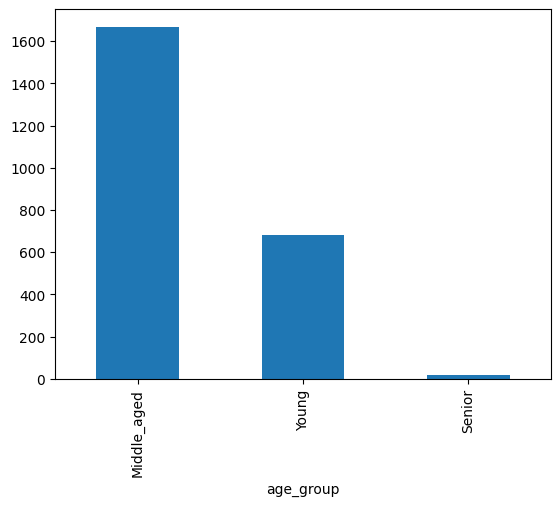

In [ ]:
agg_df['age_group'].value_counts().plot(kind = 'bar')

From this it can be inferred that middle_aged driver are associating more with the OLA and very less senior are associating with OLA as driving ola car is an intensive job so it is obvious that senior won't be that much of a part at OLA.

## Distribution of Income

<Axes: xlabel='Income', ylabel='Count'>

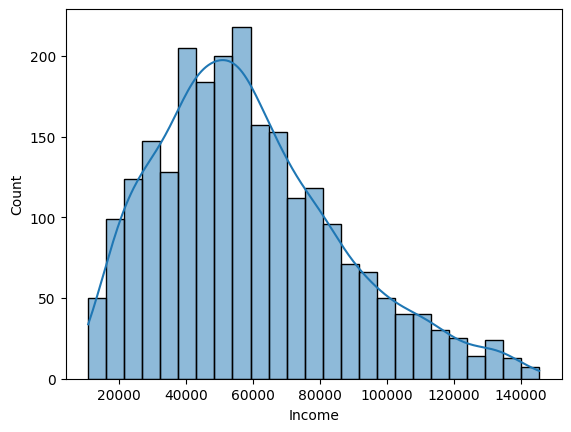

In [ ]:
sns.histplot(data = agg_df , x = 'Income' , kde = True)

Distribution seems to very close to normal distribution but still is more of a rightly skewed indicating there are certain drivers that are earning more than 1 lakh which is not usual.

## Distribution of Total business Value

<Axes: xlabel='Total Business Value', ylabel='Count'>

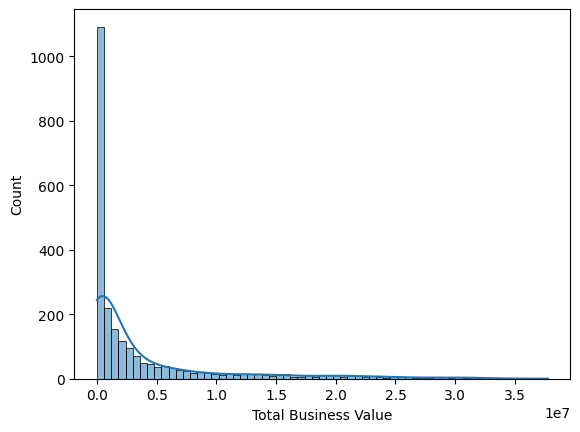

In [ ]:
sns.histplot(data = agg_df , x = 'Total Business Value' , kde = True)

This tells us that very few have high extreme values but many drivers generate low business value

## What is the quarterly rating given to each driver ?

<Axes: xlabel='Quarterly Rating', ylabel='Count'>

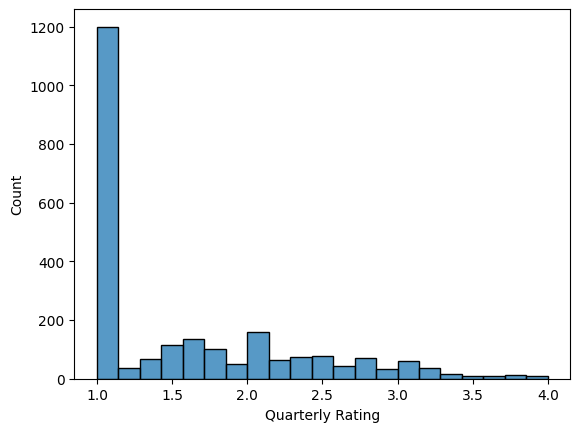

In [ ]:
sns.histplot(data = agg_df , x = 'Quarterly Rating')

This visuals indicate that most of the driver has recieved 1 rating which is a poor rating and that is not good for the company whereas very few have recieved close to 4 rating. This tells us that we need to focus more onto these drivers as it directly influences the reputation of OLA

## What sort of education background does OLA drivers have

<Axes: xlabel='Education_Level', ylabel='count'>

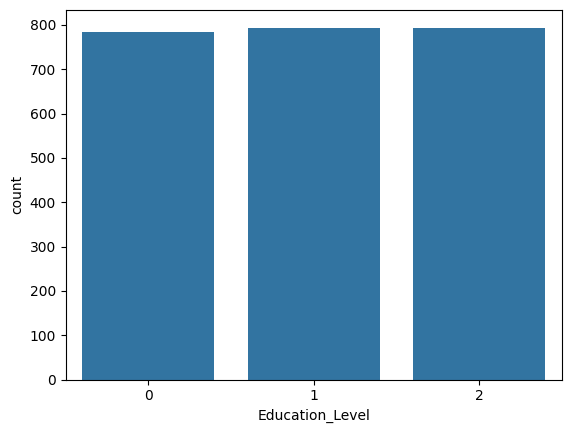

In [ ]:
sns.barplot(x = agg_df['Education_Level'].value_counts().index, y = agg_df['Education_Level'].value_counts())

In [ ]:
agg_df['Education_Level'].value_counts()

,count
Education_Level,
1,794
2,793
0,784


This clearly shows that we have equally mixed types of drivers working in OLA which again tells that no particular education level dominates at OLA

## Which locations driver predominantly operate

<Axes: xlabel='City', ylabel='Count'>

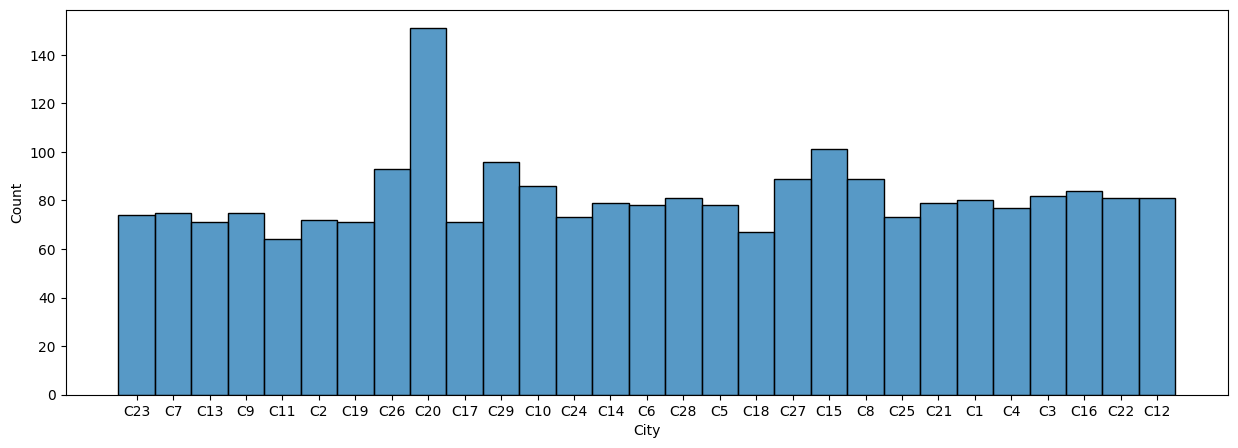

In [ ]:
plt.figure(figsize = (15,5))
sns.histplot(data = agg_df , x = 'City')

We can clearly see that Most drivers visit city C20 frequently with a value of 140+ visits, which indicates strong operational city for OLA with potentially higher customer demand and market penetration, also other cities visit are also between 60 and 100 , it might be Tier-2 cities which also indicates that these cities needed to be scaled further.

## Which Gender dominates more at OLA

<Axes: xlabel='Gender', ylabel='count'>

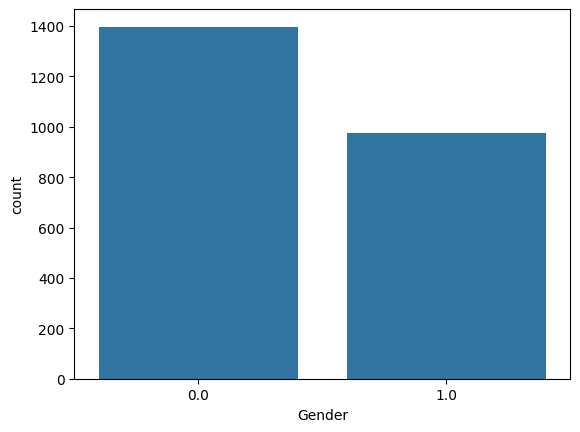

In [ ]:
sns.barplot(x = agg_df['Gender'].value_counts().index, y = agg_df['Gender'].value_counts())

This shows that male(0) gender dominates more at OLA as compared to female(1) .This relfects broader socio culture norms where driving as a profession is traditionally male dominated. From a business perspective this refelcts an opportunity for OLA to improve gender diversity and potentially introduce  initiatives to make platform more welcoming and supportive for female drivers as there are also certain cases where female drivers are more comfortable with female drivers.

In [ ]:
agg_df.columns

Index(['Driver_ID', 'Reporting Date', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Total Business Value', 'Quarterly Rating',
       'quarterly_trend', 'income_trend', 'Grade', 'joiningmonth',
       'joiningyear', 'lastworkingYear', 'lastworkingMonth', 'tenure_months',
       'age_group', 'Target'],
      dtype='object')

## What is the most joining designation work at OLA

<Axes: xlabel='Joining Designation', ylabel='count'>

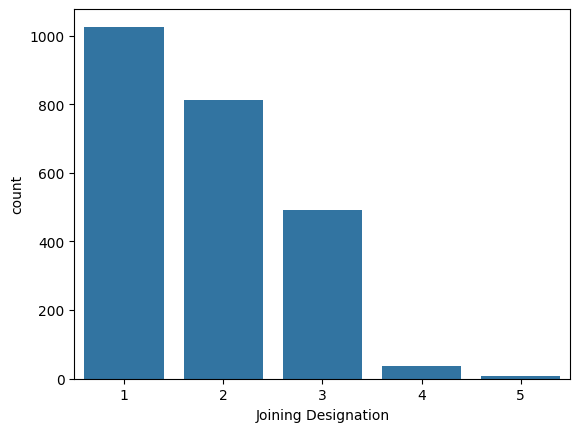

In [ ]:
sns.barplot(x = agg_df['Joining Designation'].value_counts().index, y = agg_df['Joining Designation'].value_counts())

We can clearly see that most drivers join at OLA from level 1 , few from level 2 but least from level 4 and 5. This likely indicates tiered onboarding system ehre most drivers enter at the basic level, while higher levels are reserved for experienced or specialized drivers

## What is the churning rate existing in the company ?

In [ ]:
churn_df = agg_df[agg_df['lastworkingYear'] != 'still working']

In [ ]:
exit_counts = churn_df['lastworkingYear'].value_counts().sort_index().reset_index()
exit_counts.columns = ['Year', 'Drivers_Exited']

In [ ]:
exit_counts

,Year,Drivers_Exited
0,2018.00,5
1,2019.00,821
2,2020.00,786


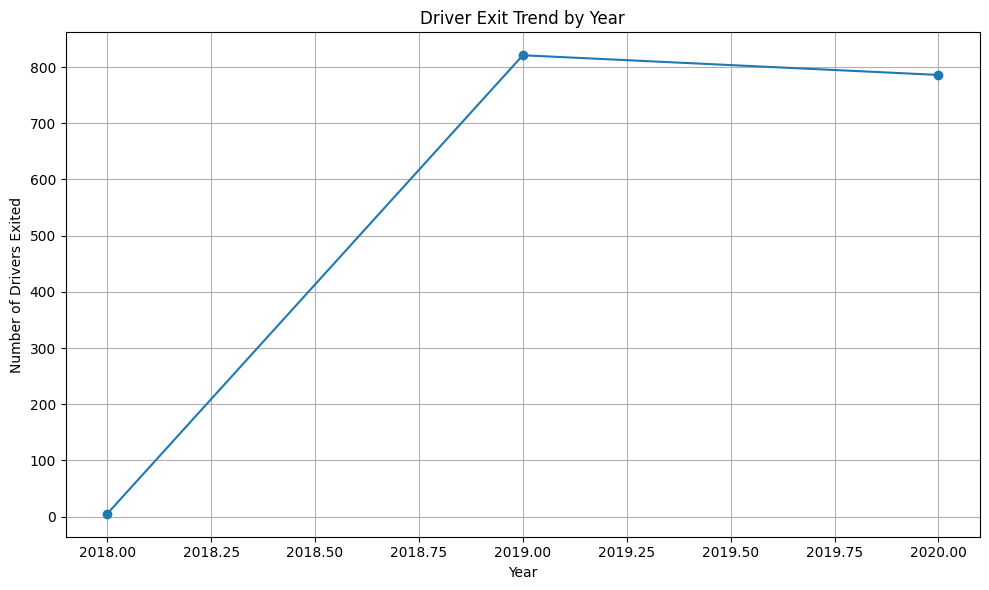

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(exit_counts['Year'], exit_counts['Drivers_Exited'], marker='o', linestyle='-')
plt.title('Driver Exit Trend by Year')
plt.xlabel('Year')
plt.ylabel('Number of Drivers Exited')
plt.grid(True)
plt.tight_layout()
plt.show()

INSIGHT : This churn trend shows that the number of driver exits was minimal in 2018 but increased significantly in 2019 reaching a peak of 821 exits. In 2020, the number of exits slightly declined to 786. This sharp spike in 2019 suggest potential dissatisfaction or operational challenges that may have influenced driver to leave. This could be due to internal policy changes, external competition or market factors

# BIVARIATE ANALYSIS

## What grades driver mostly churn

In [ ]:
churn_drivers = agg_df.groupby('Grade')['Target'].sum().sort_values(ascending = False)

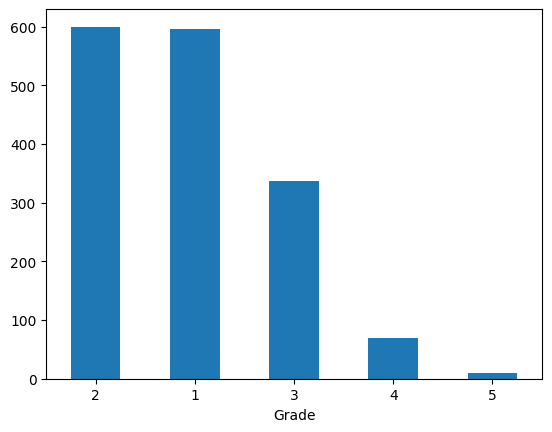

In [ ]:
churn_drivers.plot(kind = 'bar')
plt.xticks(rotation=0)
plt.show()

The bar chart shows the distribution of churned drivers across different Grades.
A majority of churned drivers belong to Grade 1 and Grade 2, indicating a higher attrition at lower grades.
As the grade level increases, the number of churned drivers significantly decreases.
This pattern suggests that higher-grade drivers are more stable and less likely to churn, possibly due to better experience, incentives, or job satisfaction.

## Driver churn analysis based on income levels

<Axes: xlabel='Target', ylabel='Income'>

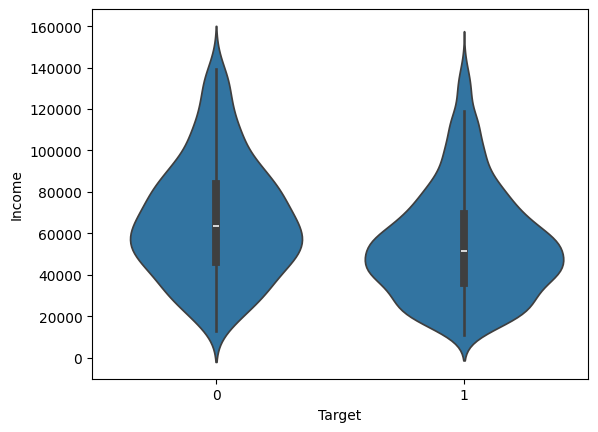

In [ ]:
sns.violinplot(data=agg_df, x='Target', y='Income')

The violin plot shows the income distribution for drivers based on their churn status.
Drivers who are still working (Target = 0) generally have higher income, with a median around 60,000–70,000, while churned drivers (Target = 1) tend to have lower income, with a median near 45,000–50,000.
This indicates a possible negative correlation between income and churn — lower-earning drivers are more likely to leave the company.
Income may therefore be a significant predictor in the churn model.

## What is the churn analysis based on Quarterly rating

<Axes: xlabel='Target', ylabel='Quarterly Rating'>

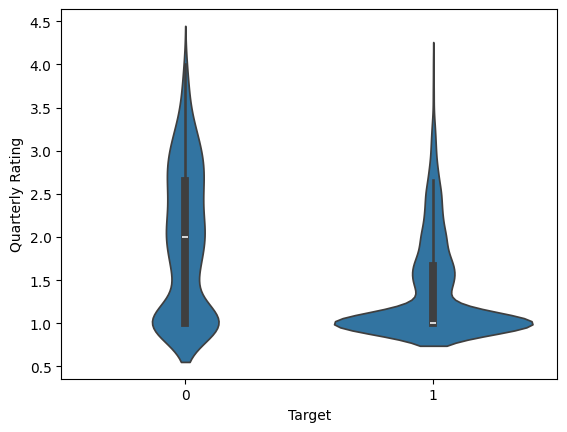

In [ ]:
sns.violinplot(data = agg_df, x = 'Target', y = 'Quarterly Rating')

This violin plot clearly shows that dirvers with very low quarterly rating are more likely to leave ola as compared to to driver who has been rated highly. For churned driver majorly close to 1 is being rated and because of this they get fewer rides as a consequence they generate lesser income and also this can become a major reason for dissatisfaction. Moreover ola may remove you from their incentive program due to these reasons driver may start looking for some other opportunity and leave the company as soon as they find it.

## Which Age group driver mostly churn from Ola

In [ ]:
age_churn = agg_df.groupby('age_group')['Target'].sum().reset_index()

In [ ]:
age_churn

,age_group,Target
0,Young,484
1,Middle_aged,1114
2,Senior,14


<Axes: xlabel='age_group', ylabel='Target'>

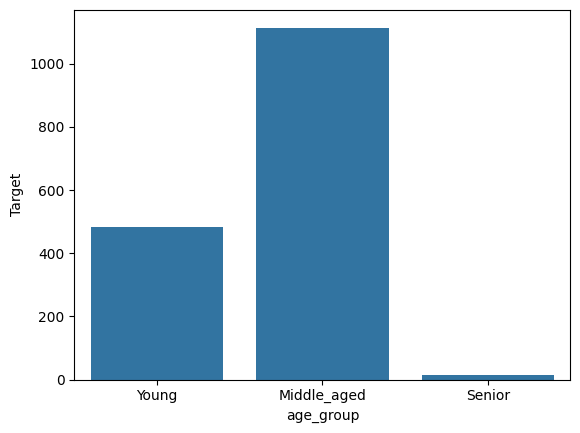

In [ ]:
sns.barplot(data = age_churn , x = 'age_group' , y = 'Target')

In [ ]:
age_linked_ola = agg_df['age_group'].value_counts().reset_index()
age_linked_ola

,age_group,count
0,Middle_aged,1668
1,Young,683
2,Senior,20


In [ ]:
merge_age = pd.merge(age_churn, age_linked_ola , on = 'age_group', how = 'left')

In [ ]:
merge_age['churn_rate'] = (merge_age['Target']/merge_age['count'])*100

In [ ]:
merge_age

,age_group,Target,count,churn_rate
0,Young,484,683,70.86
1,Middle_aged,1114,1668,66.79
2,Senior,14,20,70.00


The churn rate across all age groups hovers around 70%, indicating high attrition across the board. Young drivers exhibit the highest churn percentage (70.86%), while middle-aged drivers, being the largest demographic, contribute the most in absolute churn numbers. This suggests both age-specific and volume-driven patterns of churn, and emphasizes the need to address dissatisfaction or instability across all driver age segments.

## Which City is showing most improvement in Quarterly rating


In [ ]:
city_rating = agg_df[['Reporting Date','City','Quarterly Rating']]

In [ ]:
city_rating['quarter'] = city_rating['Reporting Date'].dt.quarter

In [ ]:
city_quarter_rating = city_rating.groupby(['City', 'quarter'])['Quarterly Rating'].mean().reset_index()

In [ ]:
first_quarter = city_quarter_rating.groupby('City').first().rename(columns={'Quarterly Rating': 'start_rating'})
last_quarter = city_quarter_rating.groupby('City').last().rename(columns={'Quarterly Rating': 'end_rating'})

In [ ]:
city_rating_change = first_quarter.join(last_quarter, lsuffix='_first', rsuffix='_last')
city_rating_change['change'] = city_rating_change['end_rating'] - city_rating_change['start_rating']

In [ ]:
most_improved_city = city_rating_change['change'].idxmax()

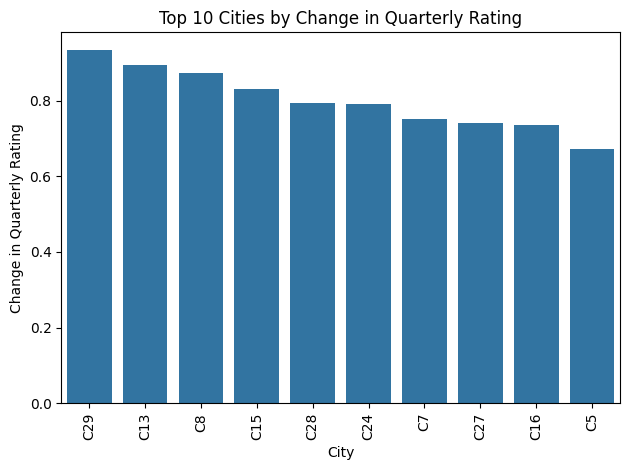

In [ ]:
city_rating_change_sorted = city_rating_change.sort_values(by='change', ascending=False).head(10)

sns.barplot(data = city_rating_change_sorted.reset_index() , x = 'City' , y = 'change')
plt.xticks(rotation = 90)
plt.title('Top 10 Cities by Change in Quarterly Rating')
plt.ylabel('Change in Quarterly Rating')
plt.tight_layout()
plt.show()

The analysis of city-wise change in quarterly ratings reveals that City C29 exhibited the most significant improvement, followed closely by Cities C13 and C8. All top 10 cities demonstrated a noticeable positive shift in driver performance, with increases in average quarterly ratings ranging from approximately 0.68 to 0.95. This upward trend suggests that drivers in these cities may have benefited from favorable operating conditions, better management practices, or increased motivation. These cities can be further explored to identify effective strategies that could be replicated across lower-performing regions to improve overall driver performance.

## Realtionship between city and driver grade

In [ ]:
city_grade = agg_df[['City','Grade']]

In [ ]:
city_grade['Grade'] = city_grade['Grade'].astype('int')

In [ ]:
city_grade_avg = city_grade.groupby('City')['Grade'].mean().sort_values(ascending=False)

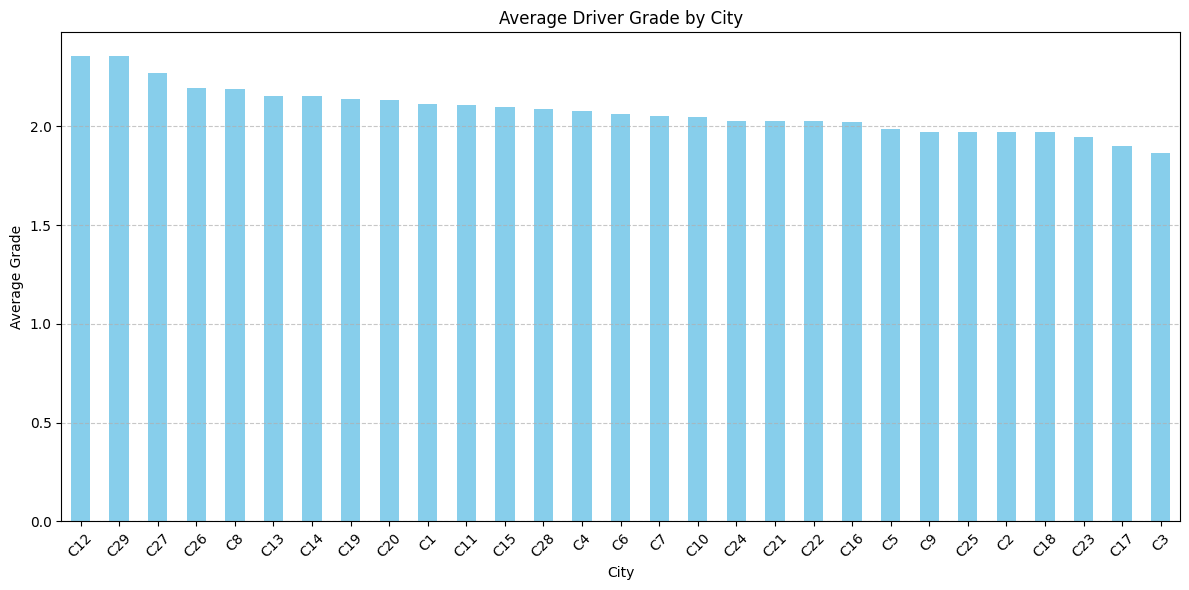

In [ ]:
plt.figure(figsize=(12,6))
city_grade_avg.plot(kind='bar', color='skyblue')
plt.title('Average Driver Grade by City')
plt.xlabel('City')
plt.ylabel('Average Grade')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This chart shows that drivers from cities like C12, C29, and C27 have better average grades compared to others, meaning they might be doing a better job overall. On the other side, cities like C17 and C3 have lower average grades, which could mean drivers there are facing some challenges. This difference could be because of things like traffic, customer behavior, or how work is managed in those cities. So, city seems to play a role in how well drivers perform.

## Grade vs total business value

In [ ]:
grade_value = agg_df.groupby('Grade')['Total Business Value'].mean().reset_index()

In [ ]:
grade_value_sort = grade_value.sort_values(by = 'Total Business Value' , ascending = False)

<Axes: xlabel='Grade', ylabel='Total Business Value'>

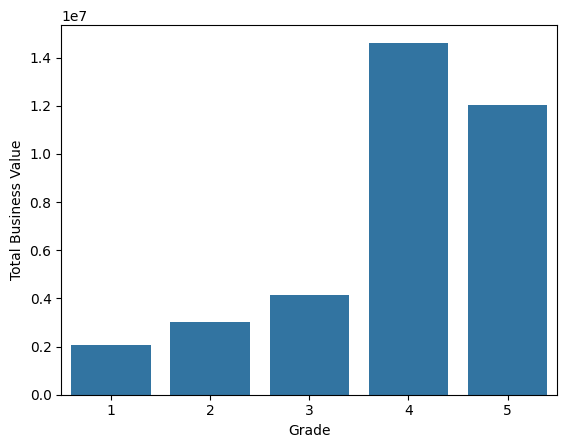

In [ ]:
sns.barplot(data = grade_value_sort , x = 'Grade' , y = 'Total Business Value')

This chart shows that drivers with higher grades tend to bring in more business value. Grade 4 drivers contribute the most, followed closely by Grade 5. As the grade decreases, the total business value also drops, with Grade 1 drivers generating the least. This suggests a strong link between driver performance (as measured by grade) and the revenue they help generate

## Does Year influence rating

In [ ]:
year_rating = agg_df[['Reporting Date','Quarterly Rating']]

In [ ]:
year_rating['Reporting_Month'] = year_rating['Reporting Date'].dt.month_name()

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

In [ ]:
year_rating['Reporting_Month'] = pd.Categorical(year_rating['Reporting_Month'], categories=month_order, ordered=True)

In [ ]:
monthly_rating = year_rating.groupby('Reporting_Month')['Quarterly Rating'].mean().reset_index()

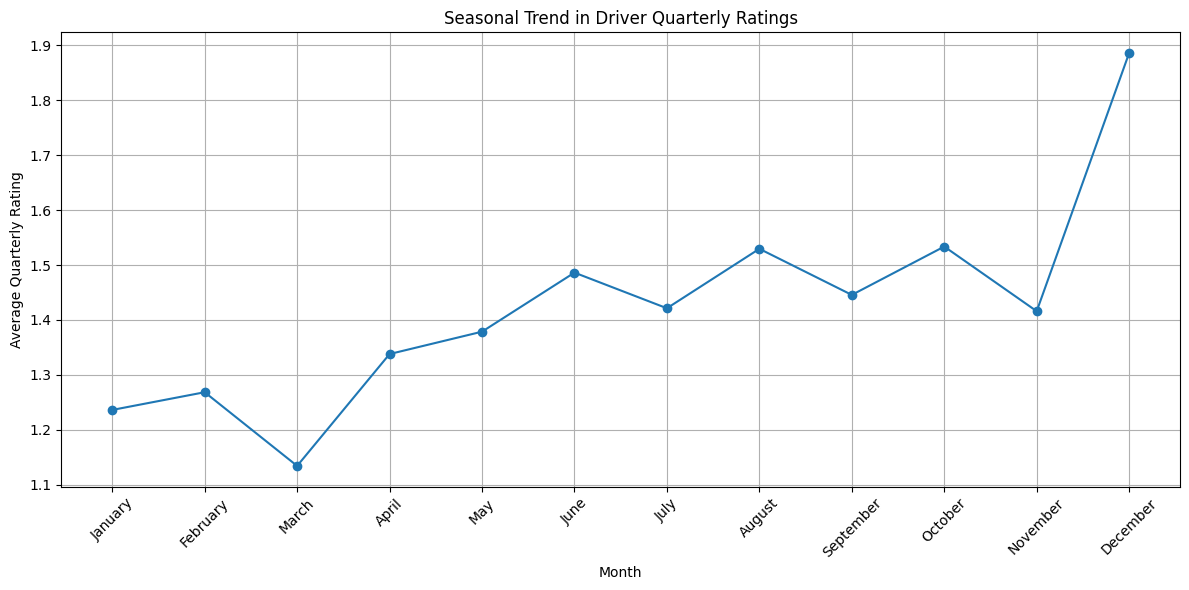

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_rating['Reporting_Month'], monthly_rating['Quarterly Rating'], marker='o', linestyle='-')
plt.title('Seasonal Trend in Driver Quarterly Ratings')
plt.xlabel('Month')
plt.ylabel('Average Quarterly Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The average quarterly rating of drivers shows a clear seasonal trend. Ratings are relatively low in the early months of the year, especially in March, but start improving steadily from April onwards. The highest average ratings are observed in December, suggesting that driver performance peaks towards the year-end. This could be due to increased ride demand, year-end incentives, or higher motivation to meet performance goals before closing the year.

# CORRELATION ANALYSIS

In [ ]:
numeric_cols = ['Target','Age', 'Income', 'Total Business Value', 'Quarterly Rating','quarterly_trend','income_trend']

<Axes: >

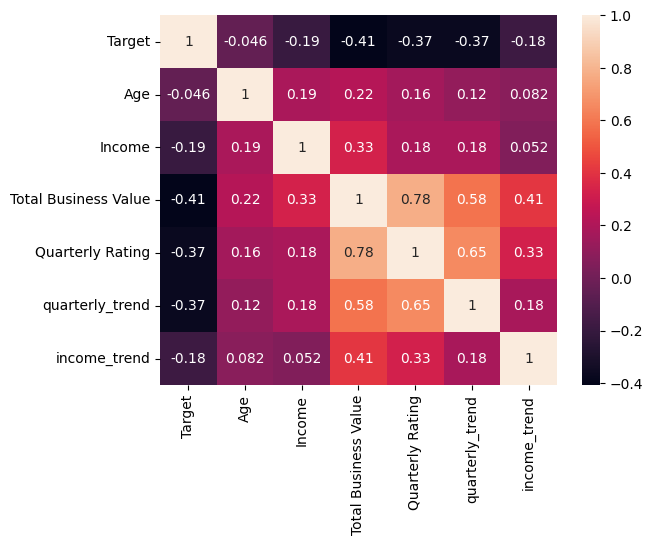

In [ ]:
sns.heatmap(agg_df[numeric_cols].corr(), annot = True)

In order to understand the key drivers of churn, I performed a correlation analysis using only numerical features. The analysis revealed that Total Business Value, Quarterly Rating, and Quarterly Trend have the strongest negative correlations with churn, indicating that drivers who contribute more revenue, receive better ratings, or show at least one positive rating trend are significantly less likely to leave the platform.
 the strong correlations between Total Business Value and Quarterly Rating (r = 0.78), as well as with Quarterly Trend (r = 0.58), reinforce a logical pattern — that high-performing drivers not only earn more but also stay longer.

# SKEWNESS CHECK

In [ ]:
agg_df[numeric_cols].skew()

,0
Target,-0.77
Age,0.52
Income,0.68
Total Business Value,2.35
Quarterly Rating,1.10
quarterly_trend,0.66
income_trend,7.23


I identified some skewed numerical features like Total Business Value , income,trend , Quarterly rating. But among these Quarterly Rating is binary in nature so i can leave it and apart from it since my approach is based solely on tree-based algorithm like XGBoost and random Fprest ,i did not perform skewness. These models are robust to feature distributions and handle skewed variable effictively.

# Feature Selection

In [ ]:
new_df = agg_df.copy()

In [ ]:
features_to_drop =  ['Driver_ID','Reporting Date','LastWorkingDate','Dateofjoining','age_group']

In [ ]:
new_df.drop(columns = features_to_drop , inplace = True)

In [ ]:
new_df['Target'].value_counts()

,count
Target,
1,1612
0,759


# Standarization

Standarization step is not necessary over here as i am going to implement RandomForest and XGBoost which are tree based model and invariant to feature scaling.

# ENCODING

In [ ]:
col_to_encode = ['Joining Designation','Gender','City']

GENDER

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
new_df['Gender'] = le.fit_transform(new_df['Gender'])

JOINING DESIGNATION

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [ ]:
encoded_array = ohe.fit_transform(new_df[['Joining Designation']])

In [ ]:
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(['Joining Designation']),index=new_df.index)

In [ ]:
new_df = pd.concat([new_df.drop('Joining Designation', axis=1), encoded_df], axis=1)

I can perform one hot encoding and label encoding before train test split but i can not perform target encoding before train test split as it will lead to data leakage

# Class Imbalance

In [ ]:
imbalance = new_df['Target'].value_counts().reset_index()

In [ ]:
imbalance['percentage'] = (imbalance['count']/imbalance['count'].sum())*100

In [ ]:
imbalance

,Target,count,percentage
0,1,1612,67.99
1,0,759,32.01


As we can see that our data is moderately imbalaced with 68 and 32 percent so we can skip Smote and use class_weight = 'balanced' in RandomForestClassifier itself.

# Bagging

## Dataset for bagging

In [ ]:
new_df_random = new_df.copy()

In [ ]:
new_df_random.drop(['lastworkingYear','lastworkingMonth','tenure_months'], axis = 1, inplace = True)

I am creating a seperate dataset because in lastworkingyear and lastworkingmonth i have 'still working' values as a part of that column and since decision tree can handle numerical values that is having order so i can just simplly repalce that value with 0 and convert it into integer datatype which seems simple and straight forward.

## Test-Train split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = new_df_random.drop('Target', axis = 1)
y = new_df_random['Target']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state = 42 , stratify= y)

## Converting City using target encoding for Bagging

In [ ]:
city_mean = pd.concat([x_train, y_train], axis=1).groupby('City')['Target'].mean()

In [ ]:
global_mean = y_train.mean() # fallback for unseen cities

In [ ]:
x_train['City'] = x_train['City'].map(city_mean)
x_test['City'] = x_test['City'].map(city_mean)

In [ ]:
x_test['City'] = x_test['City'].fillna(global_mean)  # if there are unseen data thenit will replace with global mean

## Randomized Search CV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 5,10,15],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'max_features': ['sqrt', 'log2', None]
}

In [ ]:
rfc = RandomForestClassifier(random_state=42, class_weight= 'balanced')

In [ ]:
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=60, cv=3, random_state=42,scoring ='f1',n_jobs = -1)

In [ ]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b3fb05dc750>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b3fb0b5b710>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b3fb0870ad0>},
                   random_state=42, scoring='f1')

In [ ]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 177}
Best Score: 0.9170238499801128


## Classification report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       152
           1       0.94      0.91      0.92       323

    accuracy                           0.90       475
   macro avg       0.88      0.89      0.89       475
weighted avg       0.90      0.90      0.90       475



## Confusion Matrix

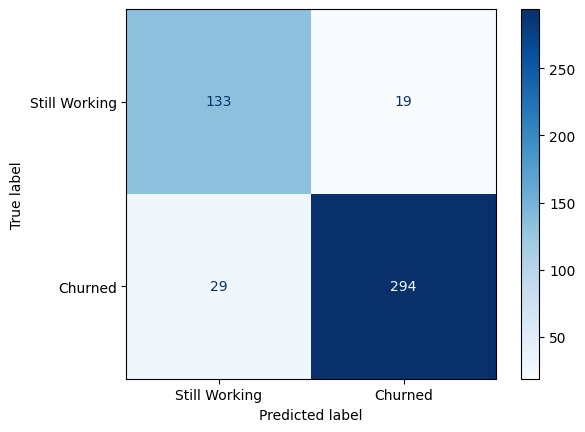

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = best_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Still Working", "Churned"])
disp.plot(cmap='Blues')

The Random forest model performed well on achieving an accuracy of 90 percent .It effectively identified churned drivers, with a precision score of .94, recall score of .91, f1-score of .92 for the churned class. The confusin matrix also indicates that only 29 churned drivers were misclassified as still working which aligns with our business objective of minimozing driver churn.

## ROC-AUC score

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

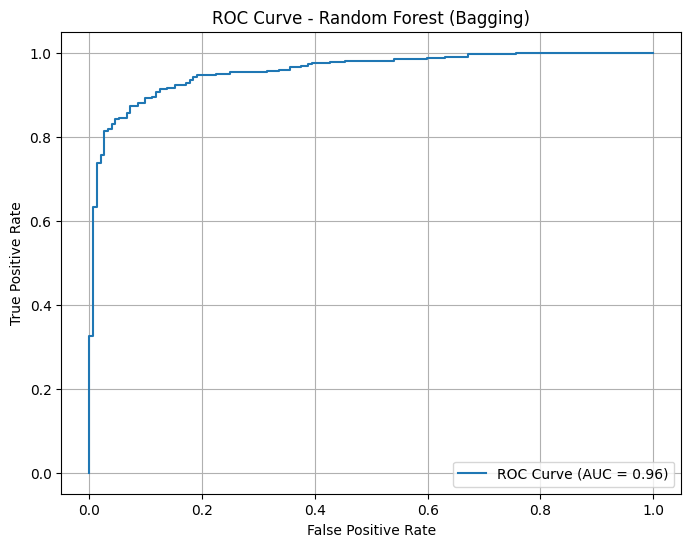

In [ ]:
y_proba = best_model.predict_proba(x_test)[:, 1]  # for churn
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Bagging)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

The Random Forest Classifier achieved an ROC AUC score of 096,indicating strong model in identifying churned drivers versus those still working, The curve demonstrates that the model maintains a huge True positive rates while minimizing false positives. This is valuable in our churn prediction context, as OLA can confidently act on drivers flagged at high churn risk.

## Feature Importance using Random Forest

In [ ]:
features = x_train.columns
importances_rf = best_model.feature_importances_

In [ ]:
rf_importance_df = pd.DataFrame({'Feature': features,'Importance': importances_rf}).sort_values(by='Importance', ascending=False)

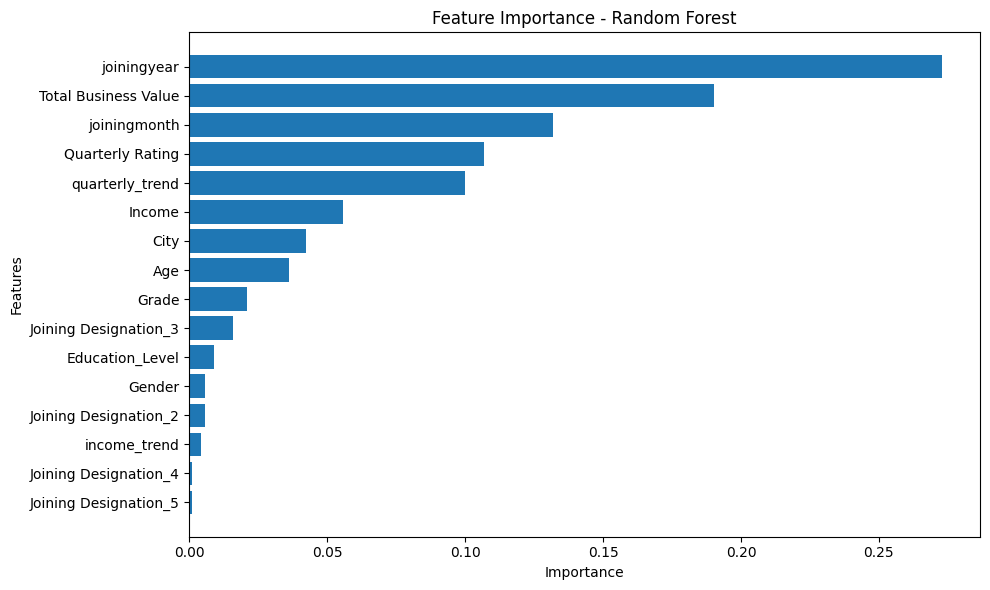

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

From the feature importance plot of the Random Forest model, we can observe that 'joining year', 'total business value', and 'joining month' are the top three drivers influencing whether a driver will churn. This suggests that employees who joined in certain years or months, or those with higher business contributions, are more likely to stay. Other important features include 'quarterly rating, quarterly trend', and 'incomew', indicating that performance and earnings also play a significant role in retention. On the other hand, features like 'gender', 'education level', and 'joining designation' seem to have a relatively low impact on predicting churn.

# Boosting

## Dataset for Boosting

In [ ]:
new_df_boost = new_df.copy()

In [ ]:
new_df_boost.drop(['lastworkingYear','lastworkingMonth','tenure_months'], axis = 1, inplace = True)

In [ ]:
obj_to_convert = ['joiningmonth','joiningyear']

In [ ]:
for i in obj_to_convert:
  new_df_boost[i] = new_df_boost[i].astype('int')

## Train-Test Split

In [ ]:
x = new_df_boost.drop('Target', axis = 1)
y = new_df_boost['Target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

## Encoding city for boosting

In [ ]:
city_mean_boost = pd.concat([x_train, y_train], axis=1).groupby('City')['Target'].mean()

In [ ]:
x_train['City'] = x_train['City'].map(city_mean_boost)
x_test['City'] = x_test['City'].map(city_mean_boost)

In [ ]:
x_test['City'] = x_test['City'].fillna(global_mean)

## Randomized search CV

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 5,10,15],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'max_features': ['sqrt', 'log2', None]
}

In [ ]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, enable_categorical=True)

In [ ]:
param_dist = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}

In [ ]:
random_search_xgb = RandomizedSearchCV(estimator=xgb_clf,param_distributions=param_dist,n_iter=50,scoring='f1',
                                       cv=3,verbose=1,n_jobs=-1,random_state=42)


In [ ]:
random_search_xgb.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=True,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_const...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 150, 200, 250],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=1)

In [ ]:
print("Best Parameters:", random_search_xgb.best_params_)
print("Best Score:", random_search_xgb.best_score_)

Best Parameters: {'subsample': 0.6, 'n_estimators': 150, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 1.0}
Best Score: 0.9233157733682463


In [ ]:
best_model_xgb = random_search_xgb.best_estimator_

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       152
           1       0.93      0.93      0.93       323

    accuracy                           0.91       475
   macro avg       0.89      0.90      0.89       475
weighted avg       0.91      0.91      0.91       475



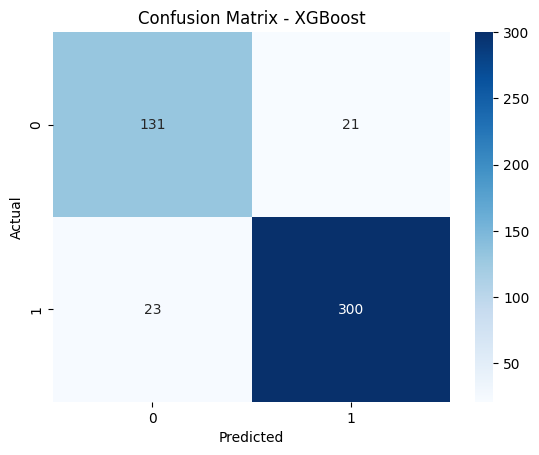

In [ ]:
y_pred_xgb = best_model_xgb.predict(x_test)

print(classification_report(y_test, y_pred_xgb))

conf_matrix = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Since the dataset is not extremely imbalanced still i used scale_pos_weight but after using that it i found that previous results were better,so i am using it without scale_pos_weight

In this i have implemented XGBoost classifier to identify churned diver at OLA and achieved strong performance especially on the churn class with precision,recall,f1-score all to be 93 percent and overall accuracy of 91 percent.This model aligns well with our business objective confusion matrix confirms that the model captures most churn cases with minimal false negatives making it reliable tool for retentin strategies.

## ROC-AUC SCORE

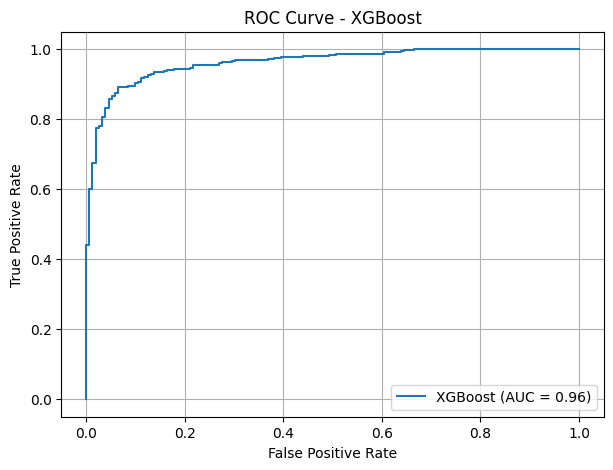

In [ ]:
y_probs_xgb = best_model_xgb.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label='XGBoost (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.grid(True)
plt.show()

The ROC curve for the XGBoost model shows that the model is working really well, with a AUC score of .96. This means the model is very good at telling the difference between drivers who are likely to churn and those who will stay. Since the curve rises quickly toward the top-left it shows that the model catched most of the churned drivers while making very few wrong predictions

## feature importance using XGboost

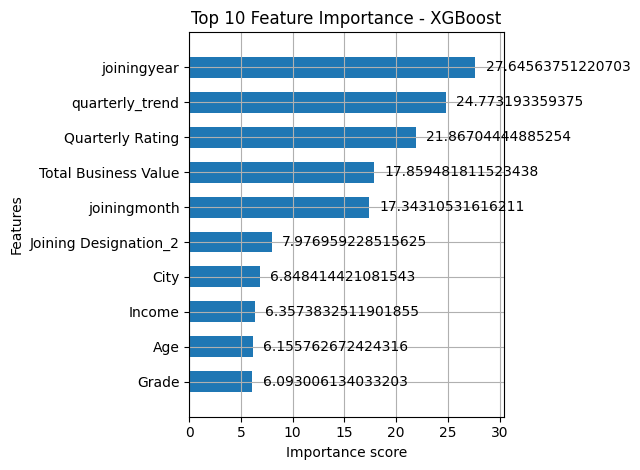

In [ ]:
xgb.plot_importance(best_model_xgb, max_num_features=10, importance_type='gain', height=0.6)
plt.title("Top 10 Feature Importance - XGBoost")
plt.tight_layout()
plt.show()

In the XGBoost model, the most important features influencing employee churn prediction are joining year, quarterly trend, quarterly rating, total business value, and joining month. These features had the highest importance scores and significantly contributed to the model’s predictive performance. Interestingly, the top features identified by XGBoost closely align with those from the Random Forest model, which confirms that certain variables consistently hold strong predictive power across different ensemble techniques.

# Questionare:

### 1. What percentage of drivers have received a quarterly rating of 5?

Answer : There are no driver that has achieved quarterly rating of 5

### 2. Comment on the correlation between Age and Quarterly Rating.

Answer : They have a correlation of .16

### 3. Name the city which showed the most improvement in Quarterly Rating over the past year

Answer : C29 is the city that has shown most improvement

### 4. Drivers with a Grade of ‘A’ are more likely to have a higher Total Business Value.
 (T/F)

Answer : False , as first of all there is alphbetical description given to grades rather it is numerical so i am assuming A:1,B:2,C:3,D:4,E:5 , but the answer is still false as highest grade with respect to total business value is 4  or D

### 5. If a driver's Quarterly Rating drops significantly, how does it impact their Total Business Value in the subsequent period?

Answer : A significant drop in a driver’s quarterly rating is likely to negatively impact their total business value in the following period. This is because lower ratings can reflect poor performance, customer dissatisfaction, or reduced ride frequency — all of which can reduce business value.Our analysis shows a strong correlation between quarterly ratings and total business value, meaning that performance declines are typically followed by a measurable decrease in the driver’s contribution to Ola’s business.

### 6. From Ola's perspective, which metric should be the primary focus for driver retention? ROCAUC , Precision , Recall ,F1Score

Answer : Recall, because we want to minimize the false negatives

### 7. How does the gapin precision and recall affect Ola's relationship with its drivers and customers?

Answer : High recall and low precision: You catch most churners, but wrongly flag loyal drivers which becomes the cause of frustration. In High precision and low recall: You correctly identify churners but miss many poor retention. so the ideal case would be Balanced F1 Score where precision and recall both matter .

### 8. Besides the obvious features like "Number of Rides", which lesser-discussed features might have a strong impact on a driver's Quarterly Rating?

Answer : Since we do not have 'Number of rides' column  so we can compare the quarterly rating with other features and out of that total business value is strongly correlated with quartertly rating followed by income , Education level , city

### 9. Will the driver's performance be affected by the City they operate in? (Yes/No)

Answer : Yes , cities may differ due to demand, traffic, and competition.

### 10. Analyze any seasonality in the driver's ratings. Do certain times of the year correspond to higher or lower ratings, and why might that be?

Answer : yes certain times of the year correspond to higher or lower ratings . This could be due to higher ride demand during festivals , winter or also driver might be highly motivated as it is the second half of the year due to year to year end targets , bonuses or incentives.

# Recommendations

1. Drivers with low quarterly ratings usually bring in less business. Ola should support them early through training or guidance to improve their performance.
2. Cities like C29 and C13 showed big improvements in driver ratings. Ola should find out what’s working well there and apply those ideas to other cities.
3. Driver ratings are usually low in March and mid-year but go up in December. Ola can give bonuses or motivational offers during low times to keep drivers encouraged.
4. Ola can use machine learning to spot when a driver’s rating is falling and send an alert to take quick action, like a call or coaching session or understanding their problem could solve the issue.
5. From the feature importance of XGBoost and Random Forest, joining year is a top factor. Drivers with earlier joining years may be closer to leaving—Ola should proactively engage with them.
6. Since rating and business value are highly correlated (0.78), Ola can set clear bonus slabs tied directly to performance ratings.
7. Although not top features, income and education level show a visible impact on ratings and performance. Offering financial literacy sessions or upskilling could subtly improve driver outcomes over time.
8. Feedback must be taken from employees with consistently low ratings.
9. If new joiners or certain designations tend to churn more, Ola can tailor onboarding programs or assign mentors to reduce early exits